In [47]:
import os
from pptx import Presentation
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [56]:
def extract_text_from_pptx(file_path):
    """Extract text from a PowerPoint file."""
    prs = Presentation(file_path)
    text = []
    
    for slide in prs.slides:
        slide_text = []
        for shape in slide.shapes:
            if shape.has_text_frame:
                for paragraph in shape.text_frame.paragraphs:
                    paragraph_text = " ".join(run.text for run in paragraph.runs)
                    slide_text.append(paragraph_text)
        if slide_text:
            text.append("\n".join(slide_text))
    
    return text


In [57]:
def extract_tables_from_pptx(file_path):
    """Extract tables from a PowerPoint file as DataFrames."""
    prs = Presentation(file_path)
    tables = []
    
    for slide_number, slide in enumerate(prs.slides, start=1):
        for shape in slide.shapes:
            if shape.has_table:
                table = shape.table
                table_data = []
                for row in table.rows:
                    row_data = [cell.text.strip() for cell in row.cells]
                    table_data.append(row_data)
                df = pd.DataFrame(table_data[1:], columns=table_data[0])  # Convert to DataFrame with headers
                tables.append({"slide_number": slide_number, "table_data": df})
    
    return tables


In [58]:
def extract_images_from_pptx(file_path, output_dir="extracted_images"):
    """Extract images from a PowerPoint file and save them to a directory."""
    os.makedirs(output_dir, exist_ok=True)
    prs = Presentation(file_path)
    images = []
    
    for slide_idx, slide in enumerate(prs.slides, start=1):
        for shape_idx, shape in enumerate(slide.shapes, start=1):
            if shape.shape_type == 13:  # Image type
                image = shape.image
                image_bytes = image.blob
                ext = image.ext
                image_path = f"{output_dir}/slide_{slide_idx}_image_{shape_idx}.{ext}"
                with open(image_path, "wb") as f:
                    f.write(image_bytes)
                images.append({"slide_number": slide_idx, "image_path": image_path})
    
    return images



In [59]:
def preview_extracted_images(images):
    """Preview extracted images using matplotlib."""
    for image_info in images:
        img_path = image_info["image_path"]
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(f"Slide {image_info['slide_number']}: {os.path.basename(img_path)}")
        plt.axis('off')
        plt.show()


In [60]:
def extract_pptx_content(file_path):
    """Extract all content (text, tables, images) from a PowerPoint file."""
    content = {"text": [], "tables": [], "images": []}
    
    # Extract text
    content["text"] = extract_text_from_pptx(file_path)
    
    # Extract tables
    tables = extract_tables_from_pptx(file_path)
    for table_info in tables:
        content["tables"].append({
            "slide_number": table_info["slide_number"],
            "table_data": table_info["table_data"]
        })
    
    # Extract images
    images = extract_images_from_pptx(file_path)
    content["images"] = images
    
    return content


In [61]:
def print_tables(tables):
    """Print tables in a readable format."""
    for i, table_info in enumerate(tables):
        try:
            print(f"\nSlide {table_info['slide_number']} - Table {i+1}:")
            print(table_info["table_data"].to_string(index=False))
        except Exception as e:
            print(f"Error processing table {i+1} on Slide {table_info['slide_number']}: {e}")
            continue

# Example usage
file_path = r"C:\Users\Megh\Desktop\2nd yr\extra-curricular\Hackathons\PPT's and videos\FEDNEXT.pptx"
content = extract_pptx_content(file_path)


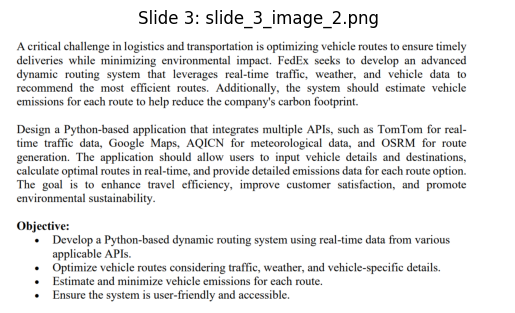

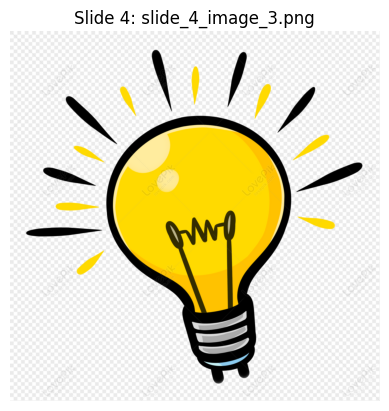

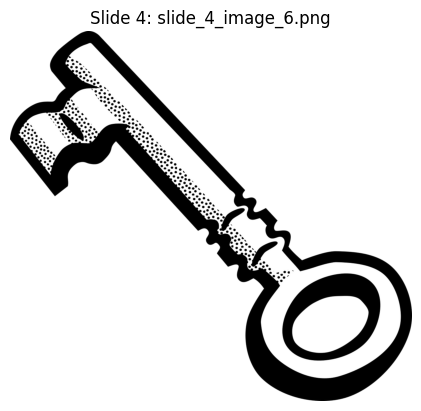

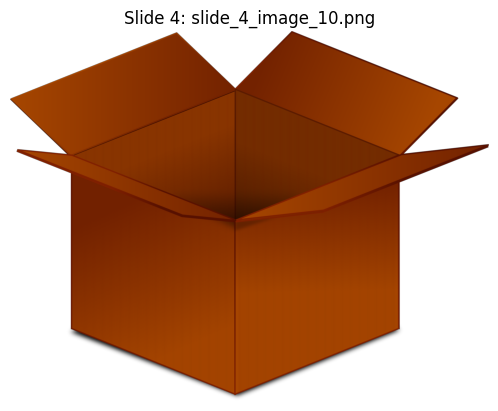

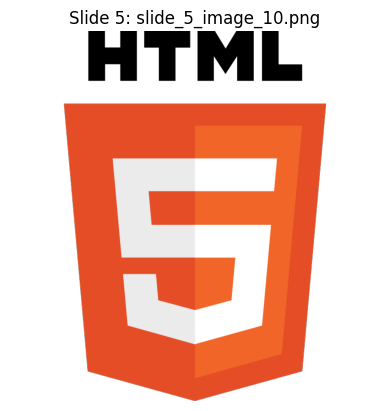

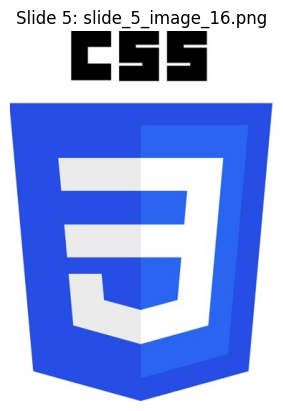

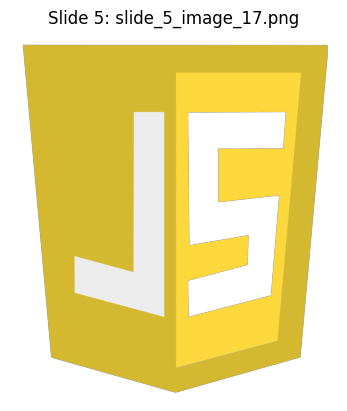

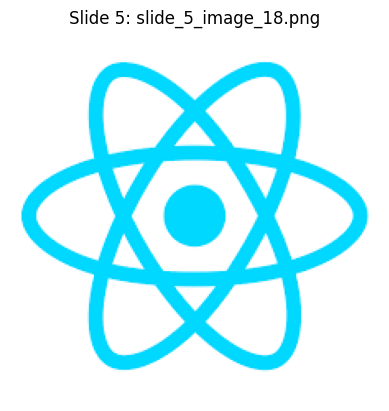

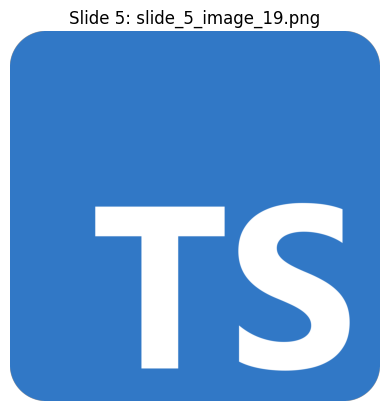

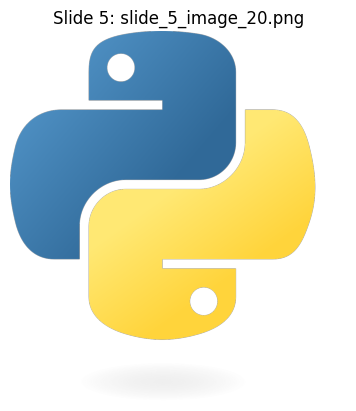

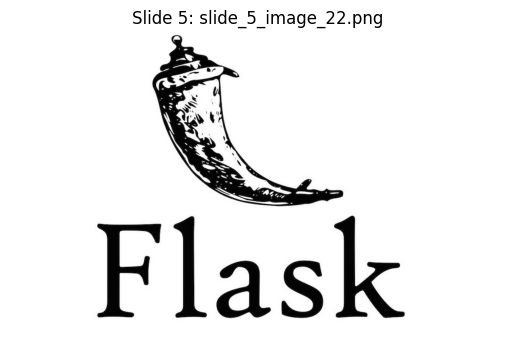

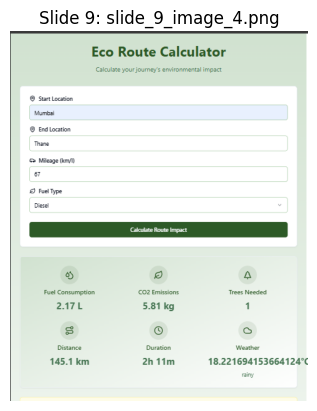

In [62]:
if content["images"]:
    preview_extracted_images(content["images"])


In [63]:
print("\nExtracted Text:\n")
for slide_text in content["text"]:
    print(slide_text)



Extracted Text:

FEDNEXT (a  Dynamic Routing System for logistics)
Team  Hackanomaly
Mehika  JHAVERI (CAPTAIN)
KASHISH MANDHANE
MEGH DAVE

Problem Statement
Idea/Solution/Prototype

1 .  Idea  Develop a dynamic routing system that leverages real-time traffic, weather, and vehicle data to optimize delivery routes for logistics companies, enhancing efficiency and reducing environmental impact.

2.  Solution:  Integrate multiple APIs, including Google Maps for routing, TomTom for traffic data, and AQICN for weather conditions, to provide users with the best route options and emissions estimates based on their vehicle specifications.

3 . Prototype  Create a user-friendly web application that allows users to input vehicle details and destinations, dynamically displaying optimal routes on a map while providing real-time updates and emissions calculations.
Solution Approach
Real-Time Data Integration : Utilize APIs from Google Maps, TomTom, and AQICN to gather real-time traffic, weather, an

In [64]:
# Print tables
print("\nExtracted Tables:\n")
print_tables(content["tables"])



Extracted Tables:


Slide 2 - Table 1:
Blah bahl Donald
Afc lorem     Mc
      ind   ROKO
       Ra    Ayo
    River  Earth

Slide 8 - Table 2:
Ram Lakhan
rax    ron


<h1>This is for flow chart</h1>

In [27]:
from pptx import Presentation

def extract_flowchart_elements(file_path):
    prs = Presentation(file_path)
    flowchart_data = []

    for slide_number, slide in enumerate(prs.slides, start=1):
        slide_shapes = []

        for shape in slide.shapes:
            # Check for geometric shapes (flowchart elements like rectangles, circles, etc.)
            if shape.is_placeholder:
                continue

            if shape.shape_type in [1, 3, 9, 20]:  # Rectangle, Oval, TextBox, or Flowchart shapes
                shape_text = shape.text.strip() if shape.has_text_frame else "No Text"
                slide_shapes.append({
                    "type": shape.shape_type,  # Shape type (e.g., rectangle, arrow)
                    "text": shape_text,  # Text inside the shape
                    "left": shape.left,  # X-coordinate
                    "top": shape.top,    # Y-coordinate
                    "width": shape.width,  # Width
                    "height": shape.height  # Height
                })

        if slide_shapes:
            flowchart_data.append({
                "slide_number": slide_number,
                "shapes": slide_shapes
            })

    return flowchart_data




In [28]:
flowchart_elements = extract_flowchart_elements(file_path)

for slide in flowchart_elements:
    print(f"Slide {slide['slide_number']}:")
    for shape in slide["shapes"]:
        print(f"  - Shape: {shape['type']}, Text: {shape['text']}, Position: ({shape['left']}, {shape['top']})")


Slide 3:
  - Shape: AUTO_SHAPE (1), Text: Problem Statement, Position: (1061885, 324465)
Slide 4:
  - Shape: AUTO_SHAPE (1), Text: Idea/Solution/Prototype, Position: (1160205, 378543)
  - Shape: AUTO_SHAPE (1), Text: , Position: (560439, 378543)
  - Shape: AUTO_SHAPE (1), Text: 1. Idea Develop a dynamic routing system that leverages real-time traffic, weather, and vehicle data to optimize delivery routes for logistics companies, enhancing efficiency and reducing environmental impact.

2. Solution: Integrate multiple APIs, including Google Maps for routing, TomTom for traffic data, and AQICN for weather conditions, to provide users with the best route options and emissions estimates based on their vehicle specifications.

3. Prototype Create a user-friendly web application that allows users to input vehicle details and destinations, dynamically displaying optimal routes on a map while providing real-time updates and emissions calculations., Position: (108155, 1037302)
  - Shape: AUTO_SH

<h3>This has to be the flowchart detection</H3>

Slide 5:
  - Shape: AUTO_SHAPE (1), Text: , Position: (2143760, 1117600)
  - Shape: AUTO_SHAPE (1), Text: , Position: (2143760, 2004059)
  - Shape: AUTO_SHAPE (1), Text: , Position: (2143760, 2912534)
  - Shape: AUTO_SHAPE (1), Text: , Position: (2143760, 3889584)
  - Shape: AUTO_SHAPE (1), Text: , Position: (5769935, 661245)
  - Shape: AUTO_SHAPE (1), Text: Tech stack, Position: (7381240, 2199639)
  - Shape: AUTO_SHAPE (1), Text: , Position: (6736080, 918632)
  - Shape: AUTO_SHAPE (1), Text: , Position: (8067040, 883919)
  - Shape: AUTO_SHAPE (1), Text: , Position: (9560560, 1260685)
  - Shape: AUTO_SHAPE (1), Text: , Position: (9530080, 2407494)
  - Shape: AUTO_SHAPE (1), Text: , Position: (6903442, 3166107)
  - Shape: AUTO_SHAPE (1), Text: , Position: (6047740, 2075601)
  - Shape: AUTO_SHAPE (1), Text: , Position: (8430538, 3140289)


<h1><bold>This is to convert the ppt to pdf</bold></h1>

In [38]:
import win32com.client

def ppt_to_pdf(input_file, output_file):
    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = 1

    presentation = powerpoint.Presentations.Open(input_file)
    presentation.SaveAs(output_file, 32)  # 32 is the PDF format
    presentation.Close()
    powerpoint.Quit()

# Example usage
input_file =r"C:\Users\Megh\Desktop\2nd yr\extra-curricular\Hackathons\PPT's and videos\FEDNEXT.pptx"
output_file = r"C:\Users\Megh\Desktop\sample.pdf"
ppt_to_pdf(input_file, output_file)


In [42]:
import win32com.client
from PyPDF2 import PdfMerger

def ppt_to_pdf(input_file, output_file):
    # Convert PowerPoint to PDF
    powerpoint = win32com.client.Dispatch("PowerPoint.Application")
    powerpoint.Visible = 1

    presentation = powerpoint.Presentations.Open(input_file)
    temp_pdf = r"C:\Users\Megh\Desktop\sample.pdf"  # Temporary file to hold the converted PDF
    presentation.SaveAs(temp_pdf, 32)  # 32 is the PDF format
    presentation.Close()
    powerpoint.Quit()

    # Merge the existing PDF with the new one
    merge_pdfs(output_file, temp_pdf)

def merge_pdfs(output_file, temp_pdf):
    # Create a PdfMerger object
    merger = PdfMerger()
    
    # Append the existing output PDF (if any) and the newly generated PDF
    try:
        merger.append(output_file)  # Append the existing PDF, if exists
    except FileNotFoundError:
        print("No existing PDF found. Creating new file.")  # Proceed if no existing PDF is found
    
    merger.append(temp_pdf)  # Append the new converted PDF
    
    # Write the merged output to the final output file
    merger.write(output_file)
    merger.close()

    print(f"Merged PDF saved as: {output_file}")

# Example usage
input_file = r"C:\Users\Megh\Desktop\2nd yr\extra-curricular\Hackathons\PPT's and videos\FEDNEXT.pptx"
output_file = r"C:\Users\Megh\Desktop\sample2.pdf"
ppt_to_pdf(input_file, output_file)


Merged PDF saved as: C:\Users\Megh\Desktop\sample2.pdf


In [40]:

from PyPDF2 import PdfMerger